**Tabla de contenido**

- [Explorando la red neuronal recurrente (RNN)](#Explorando-la-red-neuronal-recurrente-(RNN))
- [Examinando la arquitectura LSTM](#Examinando-la-arquitectura-LSTM)
    - [La puerta de olvido](#La-puerta-de-olvido)
    - [La puerta de entrada](#La-puerta-de-entrada)
    - [La puerta de salida](#La-puerta-de-salida)
- [Implementando la arquitectura LSTM](#Implementando-la-arquitectura-LSTM)
    - [Implementando un LSTM como un modelo de un solo paso](#Implementando-un-LSTM-como-un-modelo-de-un-solo-paso)
    - [Implementando un LSTM como un modelo de múltiples pasos](#Implementando-un-LSTM-como-un-modelo-de-multiples-pasos)
    - [Implementando un LSTM como un modelo de múltiples salidas](#Implementando-un-LSTM-como-un-modelo-de-multiples-salidas)
- [Próximos pasos](#Proximos-pasos)
- [Resumen](#Resumen)

Ahora exploraremos una arquitectura más avanzada llamada memoria a largo y corto plazo (LSTM), que es un caso particular de una red neuronal recurrente (RNN). Este tipo de red neuronal se utiliza para procesar secuencias de datos, donde el orden importa. Una aplicación común de RNN y LSTM es en el procesamiento del lenguaje natural. Las palabras en una oración tienen un orden, y cambiar ese orden puede cambiar completamente el significado de una oración. Por lo tanto, a menudo encontramos esta arquitectura detrás de algoritmos de clasificación de texto y generación de texto.

Otra situación en la que el orden de los datos importa es la serie temporal. Sabemos que las series temporales son secuencias de datos espaciados igualmente en el tiempo y que su orden no puede cambiarse. El punto de datos observado a las 9 a.m. debe venir antes del punto de datos a las 10 a.m. y después del punto de datos a las 8 a.m. Por lo tanto, tiene sentido aplicar la arquitectura LSTM para la predicción de series temporales.

En este capítulo, primero exploraremos la arquitectura general de una red neuronal recurrente y luego nos adentraremos en la arquitectura LSTM y examinaremos sus características y funcionamiento únicos. Luego implementaremos un LSTM utilizando Keras para producir modelos de un solo paso, de múltiples pasos y de múltiples salidas. Finalmente, compararemos el rendimiento del LSTM con todos los modelos que hemos construido, desde los de referencia hasta las redes neuronales profundas.

# Explorando la red neuronal recurrente (RNN)

Una red neuronal recurrente (RNN) es una arquitectura de aprendizaje profundo especialmente adaptada para procesar secuencias de datos. Denota un conjunto de redes que comparten una arquitectura similar: la memoria a largo y corto plazo (LSTM) y la unidad recurrente compuerta (GRU) son subtipos de RNN. En este capítulo, nos centraremos únicamente en la arquitectura LSTM.

Para entender el funcionamiento interno de una RNN, comenzaremos con la siguiente figura, que muestra una ilustración compacta de una RNN. Al igual que en una red neuronal profunda (DNN), tenemos una entrada, denotada como $x_t$, y una salida, denotada como $y_t$. Aquí $x_t$ es un elemento de una secuencia.

Cuando se alimenta a la RNN, computa un estado oculto, denotado como $h_t$. Este estado oculto actúa como memoria. Se calcula para cada elemento de la secuencia y se retroalimenta a la RNN como una entrada. De esa manera, la red utiliza efectivamente información pasada computada para elementos anteriores de la secuencia para informar la salida del siguiente elemento de la secuencia.

![RNN](fig/RNN.png)

Figura. Una ilustración compacta de una RNN. Calcula un estado oculto $h_t$, que se retroalimenta en la red y se combina con la siguiente entrada de la secuencia. Así es como las RNN mantienen información de elementos pasados de una secuencia y la utilizan para procesar el siguiente elemento de una secuencia.


La siguiente Figura muestra una ilustración ampliada de una RNN. Puedes ver cómo el estado oculto se calcula primero en t = 0 y luego se actualiza y se pasa a medida que se procesa cada elemento de la secuencia. Así es como la RNN replica efectivamente el concepto de memoria y utiliza información del pasado para producir una nueva salida.

![RNNampliada](fig/RNNampliada.png)

Sin embargo, las RNN básicas que hemos examinado tienen un inconveniente: sufren de memoria a corto plazo debido al gradiente que se desvanece. El gradiente es simplemente la función que le indica a la red cómo cambiar los pesos. Si el cambio en el gradiente es grande, los pesos cambian en gran medida. Por otro lado, si el cambio en el gradiente es pequeño, los pesos no cambian significativamente. El problema del gradiente que se desvanece se refiere a lo que sucede cuando el cambio en el gradiente se vuelve muy pequeño, a veces cerca de 0. Esto, a su vez, significa que los pesos de la red no se actualizan y la red deja de aprender.

En la práctica, esto significa que la RNN olvida la información pasada que está lejana en la secuencia. Por lo tanto, sufre de una memoria a corto plazo. Por ejemplo, si una RNN está procesando 24 horas de datos por hora, los puntos a las horas 9, 10 y 11 podrían seguir impactando la salida a la hora 12, pero cualquier punto anterior a la hora 9 podría no contribuir en absoluto al aprendizaje de la red, porque el gradiente se vuelve muy pequeño para esos puntos de datos tempranos.

Por lo tanto, debemos encontrar una manera de retener la importancia de la información pasada en nuestra red. Esto nos lleva a la arquitectura de memoria a corto y largo plazo (LSTM), que utiliza el estado de la celda como una forma adicional de mantener la información pasada en la memoria durante mucho tiempo.


# Examinando la arquitectura LSTM

La arquitectura de memoria a corto plazo larga (LSTM) añade un estado de celda a la arquitectura RNN para evitar el problema del gradiente que desaparece, donde la información del pasado deja de afectar el aprendizaje de la red. Esto permite que la red mantenga información del pasado en la memoria por un período de tiempo más prolongado.

La arquitectura LSTM se muestra en la siguiente figura, y puedes ver que es más compleja que la arquitectura RNN básica. Notarás la adición del estado de celda, denotado como C. Este estado de celda es lo que permite a la red mantener información pasada en la red por un período más prolongado, resolviendo así el problema del gradiente que desaparece.

Tenga en cuenta que esto es único de la arquitectura LSTM. Aún tenemos un elemento de una secuencia que se está procesando, mostrado como $x_t$, y también se calcula un estado oculto, denotado como $h_t$. En este caso, tanto el estado de la celda $C_t$ como el estado oculto ht se pasan al siguiente elemento de la secuencia, asegurando que la información pasada se utilice como entrada para el siguiente elemento en la secuencia que se está procesando.

![LSTM](fig/LSTM.png)

Figura. La arquitectura de una neurona LSTM. El estado de la celda se denota como C, mientras que la entrada es x y el estado oculto es h.

También notarás la presencia de tres puertas: la puerta de olvido, la puerta de entrada y la puerta de salida. Cada una tiene su función específica en el LSTM, así que exploremos cada una en detalle.

## La puerta de olvido

`La puerta de olvido (forget gate)` es la primera puerta en una celda LSTM. Su función es determinar qué información, tanto de los valores pasados como del valor actual de la secuencia, debe ser olvidada o mantenida en la red.

! [Puerta-de-olvido](fig/puertadeolvido.png)

Figura. `La puerta de olvido en una celda LSTM`. El elemento presente de una secuencia, $x_t$, y la información pasada, $h_{t–1}$, se combinan primero. Se duplican, y uno se envía a la puerta de entrada mientras que el otro pasa por la función de activación sigmoide. `La sigmoide produce un valor entre 0 y 1`, y si la salida está cerca de 0, esto significa que la información debe ser olvidada. Si está cerca de 1, la información se mantiene. La salida se combina entonces con el estado de la celda pasada utilizando multiplicación punto a punto, generando un estado de celda actualizado $C'_{t–1}$.

Al observar la figura, podemos ver cómo los diferentes inputs fluyen a través de la puerta de olvido. Primero, el estado oculto pasado $h_{t–1}$ y el valor presente de una secuencia $x_t$ se alimentan a la puerta de olvido. Recuerda que el estado oculto pasado lleva información de valores anteriores. Luego, $h_t–1$ y $x_t$ se combinan y se duplican. Una copia va directamente a la puerta de entrada, que estudiaremos en la siguiente sección. La otra copia se envía a través de una función de activación sigmoide, que se expresa como en la siguiente ecuación. 
$$
f(x) = \frac{1}{1 - e^{-x}}
$$

![Sigmoide](fig/Sigmoide.png)

La función sigmoide determina qué información conservar o olvidar. Esa salida se combina luego con el estado de celda anterior $C_{t–1}$ utilizando multiplicación punto a punto. Esto resulta en un estado de celda actualizado que llamamos $C'_{t–1}$.

Una vez hecho esto, se envían dos cosas a la puerta de entrada: un estado de celda actualizado y una copia de la combinación del estado oculto anterior y el elemento actual de la secuencia.


## La puerta de entrada

Una vez que la información ha pasado a través de la puerta de olvido, procede a la puerta de entrada. Este es el paso en el que la red determina qué información es relevante del elemento actual de la secuencia. El estado de la celda se actualiza nuevamente aquí, lo que da como resultado el estado final de la celda.

![Puerta-entrada](fig/Puertadeentrada.png)

Figura.  La puerta de entrada de un LSTM. El estado oculto pasado y el elemento actual de la secuencia se duplican nuevamente y se envían a través de una función de activación sigmoidea y una hiperbólica. función de activación tangente (tanh). Nuevamente, el sigmoide determina qué información se guarda o descarta, mientras que la función tanh regula la red para mantenerla computacionalmente eficiente. Los resultados de ambas operaciones se combinan usando multiplicación puntual, y el resultado se usa para actualizar el estado de la celda usando puntual adición, dando como resultado el estado final de la célula $C_t$. Este estado final de la celda se envía luego a la puerta de salida. Mientras tanto, la misma combinación, [$h_{t–1} + x_t$], también se envía a la puerta de salida. 

 La combinación del estado oculto anterior y el elemento actual de una secuencia [$h_{t–1} + x_t$] que proviene de la puerta de olvido se alimenta en la puerta de entrada y se duplica nuevamente. Una copia sale de la puerta de entrada hacia la puerta de salida, que exploraremos en la próxima sección. Otra copia se envía a través de la función de activación sigmoide para determinar si la información se mantendrá o se olvidará. Otra copia se envía a través de la función tangente hiperbólica (tanh), que se muestra en la siguiente figura.

 ![Tanh](fig/tanh.png)

 Figura. La función tangente hiperbólica (tanh) genera valores entre -1 y 1. En el contexto de la LSTM, esto sirve como una forma de regular la red, asegurándose de que los valores no sean muy grandes y asegurando que la computación sigue siendo eficiente.

 Las salidas de las funciones sigmoide y tanh se combinan mediante multiplicación puntual, y el resultado se combina con el estado de celda actualizado viniendo de la puerta olvidada $C'_{t - 1}$ usando suma puntual. Esta operación genera el estado final $C_t$ de la celda.

 Por lo tanto, es en la puerta de entrada donde agregamos información del elemento actual en la secuencia a la memoria larga de la red. Este estado de celda recién actualizado se envía luego a la puerta de salida.


## La puerta de salida

La información ha pasado ahora de la puerta de olvido a la puerta de entrada, y ahora llega a la puerta de salida. Es en esta puerta donde la información pasada contenida en la memoria de la red, representada por el estado de la celda $C_t$, se utiliza finalmente para procesar el elemento actual de la secuencia. Aquí es donde la red o bien produce un resultado para la capa de salida o calcula nueva información que se enviará al procesamiento del siguiente elemento en la secuencia.

![Puerta-Salida](fig/puertadesalida.png)

Figura. La puerta de salida de un LSTM. El estado oculto pasado y el elemento actual de una secuencia [$h_{t–1} + x_t$] se pasan a través de la función sigmoide para determinar si se mantendrá la información o descartado. Luego, el estado de la celda se pasa a través de la función tanh y se combina con la salida del sigmoide mediante multiplicación puntual. Este es el paso en el que se usa información pasada para procesar el elemento actual de una secuencia. Luego generamos un nuevo estado oculto $h_t$, que se pasa a la siguiente neurona LSTM o a la capa de salida. El estado de la celda también se genera.

En la figura, el estado oculto pasado y el elemento actual de una secuencia se envían a través de la función sigmoide. En paralelo, el estado de la celda pasa por la función tanh. Los valores resultantes de las funciones tanh y sigmoide se combinan luego usando multiplicación punto a punto, generando un estado oculto actualizado $h_t$. Este es el paso en el que se utiliza la información pasada, representada por el estado de la celda $C_t$, para procesar la información del elemento presente de la secuencia.

El estado oculto actual se envía entonces a través de la puerta de salida. Esto se enviará ya sea a la capa de salida de la red o al siguiente neurona LSTM que trata el siguiente elemento de la secuencia. Lo mismo se aplica al estado de la celda $C_t$.

`En resumen, la puerta de olvido determina qué información del pasado se conserva o se descarta. La puerta de entrada determina qué información del paso actual se mantiene para actualizar la memoria de la red o se descarta. Finalmente, la puerta de salida utiliza la información del pasado almacenada en la memoria de la red para procesar el elemento actual de una secuencia.`

# Implementando la arquitectura LSTM

Ahora implementaremos la arquitectura LSTM para el conjunto de datos de tráfico interestatal con el que hemos estado trabajando desde el capítulo 12. Recuerda que el objetivo principal de nuestro escenario es el volumen de tráfico. Para el modelo de múltiples salidas, los objetivos son el volumen de tráfico y la temperatura.

Implementaremos LSTM como un modelo de un solo paso, un modelo de múltiples pasos y un modelo de múltiples salidas. El modelo de un solo paso predecirá el volumen de tráfico para el próximo intervalo de tiempo únicamente, el modelo de múltiples pasos predecirá el volumen de tráfico para las próximas 24 horas, y el modelo de múltiples salidas predecirá la temperatura y el volumen de tráfico para el próximo intervalo de tiempo.

`Clase datawindow`

La clase se basa en el ancho de la entrada (input_width), el ancho de la etiqueta (label_width) y el desplazamiento (shift). El ancho de la entrada es simplemente el número de pasos de tiempo que se introducen en el modelo para hacer predicciones.

El ancho de la etiqueta (label_width) es equivalente al número de pasos de tiempo en las predicciones. 

Finalmente, el desplazamiento (shift) es el número de pasos de tiempo que separan la entrada de las predicciones. 

1. Nombre de la columna que deseamos predecir
2. Cree un diccionario con el nombre y el índice de la columna etiqueta. Esto se usará para trazar.
3. Cree un diccionario con el nombre y el índice de cada columna. Esto se usará para separar las entidades de la variable de destino.
4. La función de división devuelve un objeto de división que especifica cómo dividir una secuencia. En este caso, dice
que el segmento de entrada comienza en 0 y termina cuando alcanzamos el input_width.
5. Asigne índices a las entradas. Estos son útiles para trazar.
6. Obtenga el índice en el que comienza la etiqueta. En este caso, es el tamaño total de la ventana menos el ancho de la etiqueta.
7. Los mismos pasos que se aplicaron para las entradas se aplican para las etiquetas.
8. Corta la ventana para obtener las entradas usando el input_slice definido en __init__.
9. Corta la ventana para obtener las etiquetas usando labels_slice definido en __init__.
10. Si tenemos más de un objetivo, apilamos las etiquetas.
11. La forma será [lote, tiempo, características]. En este punto, solo especificamos la dimensión de tiempo y permitimos que las dimensiones de lote y características se definan más tarde.
12. Plotea las entradas. Aparecerán como una línea continua azul con puntos.
13. Grafique las etiquetas o los valores reales. Aparecerán como cuadrados verdes.
14. Traza las predicciones. Aparecerán como cruces rojas.

`Función que crea los tensores`


15. Pase los datos. Esto corresponde a nuestro conjunto de entrenamiento, conjunto de validación o conjunto de prueba.
16. Los objetivos se establecen en Ninguno, ya que son manejados por la función split_to_input_labels.
17. Define la longitud total del arreglo, que es igual a la longitud total de la ventana.
18. Define el número de pasos de tiempo que separan cada secuencia. En nuestro caso, queremos que las secuencias sean consecutivas, así que sequence_stride=1.
19. Baraja las secuencias. Ten en cuenta que los datos aún están en orden cronológico. Simplemente estamos cambiando el orden de las secuencias, lo que hace que el modelo sea más robusto.
20. Defina el número de secuencias en un solo lote. Recuerda que estamos reorganizando las secuencias en un lote. Esto significa que dentro de cada secuencia, los datos están en orden cronológico. Sin embargo, en un lote de 32 secuencias, podemos y debemos barajarlas para hacer que nuestro modelo sea más robusto y menos propenso al sobreajuste.

21. Obtenga un lote de muestra de datos para fines de representación gráfica. Si el lote de muestra no existe, recuperaremos un lote de muestra y lo almacenaremos en caché.


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

class DataWindow():
    def __init__(self, input_width, label_width, shift,
                 train_df=train_df, val_df=val_df, 
                 test_df=test_df,label_columns=None):
        
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        self.label_columns = label_columns #1
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in enumerate(label_columns)} #2
        
        self.column_indices = {name: i for i, name in enumerate(train_df.columns)} #3

        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width) #4

        self.input_indices = np.arange(self.total_window_size)[self.input_slice] #5 
        self.label_start = self.total_window_size - self.label_width #6

        self.labels_slice = slice(self.label_start, None) #7 
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def split_to_inputs_labels(self, features):
        inputs = features[:, self.input_slice, :] # 8
        labels = features[:, self.labels_slice, :] # 9

        if self.label_columns is not None: # 10 
            labels = tf.stack(
                [labels[:,:,self.column_indices[name]] for name in self.label_columns],
                axis=-1
            )

        inputs.set_shape([None, self.input_width, None]) #11 
        labels.set_shape([None, self.label_width, None])
        return inputs, labels
    # Método para trazar una muestra de ventanas de datos
    def plot(self, model=None, plot_col='traffic_volume', max_subplots=3):
        inputs, labels = self.sample_batch
        plt.figure(figsize=(12, 8))
        plot_col_index = self.column_indices[plot_col]
        max_n = min(max_subplots, len(inputs))

        for n in range(max_n):
            plt.subplot(3, 1, n+1)
            plt.ylabel(f'{plot_col} [scaled]')
            plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                     label='Inputs', marker='.', zorder=-10) # 12
            if self.label_columns:
                label_col_index = self.label_columns_indices.get(plot_col,None)
            else:
                label_col_index = plot_col_index
            if label_col_index is None:
                continue

            plt.scatter(self.label_indices, labels[n, :, label_col_index],
                        edgecolors='k', marker='s', label='Labels',c='green', s=64) # 13
            
            if model is not None:
                predictions = model(inputs)
                plt.scatter(self.label_indices, predictions[n, :,label_col_index],marker='X', 
                            edgecolors='k', label='Predictions',c='red', s=64) #14
            if n == 0:
                plt.legend()
            plt.xlabel('Time (h)')
        
    # Función que crea los tensores con los datos temporales
    def make_dataset(self, data):
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.preprocessing.timeseries_dataset_from_array(
            data=data,                              # 15
            targets=None,                           #16
            sequence_length=self.total_window_size, #17
            sequence_stride=1,                      #18
            shuffle=True,                           #19
            batch_size=32                           #20
        )
        ds = ds.map(self.split_to_inputs_labels)
        return ds
    """ 
    Concluiremos nuestra clase DataWindow definiendo algunas propiedades para aplicar 
    la función make_dataset en los conjuntos de entrenamiento, validación y prueba. 
    También crearemos un lote de muestra que almacenaremos en caché dentro de la clase para fines de trazado.
    """
    @property
    def train(self):
        return self.make_dataset(self.train_df)
    @property
    def val(self):
        return self.make_dataset(self.val_df)
    @property
    def test(self):
        return self.make_dataset(self.test_df)
    @property
    def sample_batch(self):                          #21
        result = getattr(self, '_sample_batch', None)
        if result is None:
            result = next(iter(self.train))
            self._sample_batch = result
        return result

2025-07-10 14:43:28.721953: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752176608.737572   36449 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752176608.742118   36449 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1752176608.753240   36449 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1752176608.753256   36449 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1752176608.753258   36449 computation_placer.cc:177] computation placer alr

In [4]:
import pandas as pd
import os

file_path = lambda file: os.path.join(os.getcwd(),'data',file)
train_df = pd.read_csv(file_path('train.csv'),index_col=0)
val_df = pd.read_csv(file_path('val.csv'),index_col=0)
test_df = pd.read_csv(file_path('test.csv'),index_col=0)

train_df.head()

,temp,clouds_all,traffic_volume,day_sin,day_cos
0,0.760019,0.0,0.758755,0.25000,0.933013
1,0.738174,0.0,0.560765,0.37059,0.982963
2,0.698884,0.0,0.463513,0.50000,1.000000
3,0.668238,0.0,0.370029,0.62941,0.982963
4,0.643093,0.0,0.325101,0.75000,0.933013


## Implementando un LSTM como un modelo de un solo paso

Comenzaremos implementando la arquitectura LSTM como un modelo de un solo paso. En este caso, utilizaremos 24 horas de datos como entrada para predecir el siguiente intervalo de tiempo. De esta manera, hay una secuencia de tiempo que puede ser procesada por la LSTM, lo que nos permite aprovechar la información pasada para hacer una predicción futura.

Primero necesitamos crear una ventana de datos para entrenar el modelo. Esta será una ventana amplia, con 24 horas de datos como entrada. Para propósitos de representación gráfica, el ancho de la etiqueta también es 24, de modo que podamos comparar las predicciones con los valores reales a lo largo de 24 pasos de tiempo. Tenga en cuenta que este sigue siendo un modelo de un solo paso, por lo que durante 24 horas el modelo solo predecirá un paso de tiempo a la vez, al igual que una previsión en movimiento.


In [5]:
wide_window = DataWindow(input_width=24, label_width=24, shift=1,label_columns=['traffic_volume'])

Entonces necesitamos definir nuestro modelo LSTM en Keras. Nuevamente utilizaremos el modelo Secuencial para permitirnos apilar diferentes capas en nuestra red. Keras convenientemente viene con la capa LSTM, que implementa un LSTM. Estableceremos `return_sequences en True`, ya que esto `le indica a Keras que use información pasada de la secuencia, en forma del estado oculto y el estado de la celda`, que cubrimos anteriormente. Finalmente, definiremos la capa de salida, que es simplemente una capa Densa con una unidad porque solo estamos pronosticando el volumen de tráfico.

`función ompile_and_fit`

1. La función toma un modelo y una ventana de datos de la clase DataWindow. La paciencia (patience) es el número de épocas después de las cuales el modelo debe dejar de entrenarse si la pérdida de validación no mejora; max_epochs establece un número máximo de épocas para entrenar el modelo.
2. Se rastrea la pérdida de validación para determinar si debemos aplicar la detención temprana o no.
3. El paro temprano ocurre si 3 épocas consecutivas no disminuyen la pérdida de validación, según lo establecido por el parámetro de paciencia.
4. El MSE se utiliza como la función de pérdida.
5. El MAE se utiliza como una métrica de error. Así es como comparamos el rendimiento de nuestros modelos. Un MAE más bajo significa un mejor modelo.
6. El modelo es ajustado al conjunto de entrenamiento.
7. El modelo puede entrenar un máximo de 50 épocas, según lo establecido por el parámetro max_epochs.
8. Utilizamos el conjunto de validación para calcular la pérdida de validación.
9. early_stopping se pasa como un callback. Si la pérdida de validación no disminuye después de 3 épocas consecutivas, el modelo deja de entrenar. Esto evita el sobreajuste.


In [6]:
# Función para configurar un modelo de aprendizaje profundo y ajustarlo a los datos
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError

def compile_and_fit(model, window, patience=3, max_epochs=50): #1
    early_stopping = EarlyStopping(monitor='val_loss', #2
                                   patience=patience, #3
                                   mode='min')
    model.compile(loss=MeanSquaredError(), #4
                  optimizer=Adam(),
                  metrics=[MeanAbsoluteError()]) #5
    
    history = model.fit(window.train, #6
                        epochs=max_epochs,#7
                        validation_data=window.val,#8
                        callbacks=[early_stopping]) #9
    return history

1. Establece return_sequences en True para asegurarte de que la red esté utilizando información pasada.

In [7]:
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, LSTM

# Modelo LSTM
lstm_model = Sequential([
    LSTM(32, return_sequences=True),#❶
    Dense(units=1)
])

I0000 00:00:1752177279.500424   36449 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 905 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2070 with Max-Q Design, pci bus id: 0000:01:00.0, compute capability: 7.5


Es así de simple. Ahora podemos entrenar el modelo utilizando la función compile_and_fit y almacenar su rendimiento en los conjuntos de validación y prueba.

1. Crea un diccionario para contener el MAE de un modelo en el conjunto de validación.
2. Crea un diccionario para contener el MAE de un modelo en el conjunto de prueba.

In [8]:
history = compile_and_fit(lstm_model, wide_window)
val_performance = {} # 1
performance = {} #2
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

Epoch 1/50


I0000 00:00:1752177351.841844   45555 cuda_dnn.cc:529] Loaded cuDNN version 90300


384/384 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0389 - mean_absolute_error: 0.1412 - val_loss: 0.0077 - val_mean_absolute_error: 0.0628
Epoch 2/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0066 - mean_absolute_error: 0.0581 - val_loss: 0.0042 - val_mean_absolute_error: 0.0467
Epoch 3/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0043 - mean_absolute_error: 0.0463 - val_loss: 0.0034 - val_mean_absolute_error: 0.0412
Epoch 4/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0036 - mean_absolute_error: 0.0417 - val_loss: 0.0030 - val_mean_absolute_error: 0.0382
Epoch 5/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0032 - mean_absolute_error: 0.0389 - val_loss: 0.0026 - val_mean_absolute_error: 0.0356
Epoch 6/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0029 - mean_absolute_error: 0.0371 - val_loss: 0.0024 - val_mean_absolute_error: 0.0341
Epoch 7/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0028 - mean_absolute_error: 0.0358 - val_loss: 0.

Opcionalmente, podemos visualizar las predicciones de nuestro modelo en tres secuencias muestreadas.

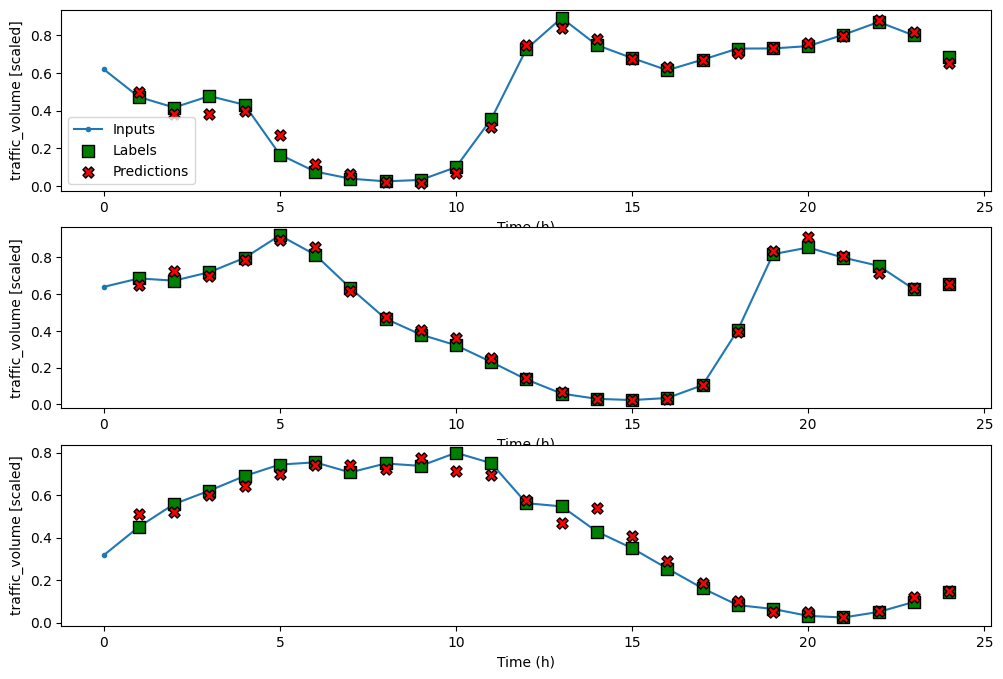

In [9]:
wide_window.plot(lstm_model)

Figura. *Prediciendo el volumen de tráfico utilizando un LSTM como modelo de un solo paso. Muchas predicciones (mostradas como cruces) se superponen con las etiquetas (mostradas como cuadrados), lo que sugiere que tenemos un modelo eficiente con predicciones precisas.*


## Implementando un LSTM como un modelo de multiples pasos

Pasaremos a implementar la arquitectura LSTM como un modelo de múltiples pasos. En este caso, deseamos predecir el volumen de tráfico para las próximas 24 horas, utilizando una ventana de entrada de 24 horas.

Primero, definiremos la ventana de tiempo para alimentar nuestro modelo. El input_width y el label_width son ambos 24, ya que queremos ingresar 24 horas de datos y evaluar las predicciones en 24 horas de datos también. Esta vez, el desplazamiento también es 24, especificando que el modelo debe producir predicciones para las próximas 24 horas en una sola vez.

In [10]:
multi_window = DataWindow(input_width=24, label_width=24, shift=24,label_columns=['traffic_volume'])

A continuación, definiremos nuestro modelo en Keras. Del capítulo 14, es posible que recuerdes que el proceso de definir el modelo de múltiples pasos y el modelo de un solo paso era exactamente el mismo. Lo mismo ocurre aquí. Seguimos utilizando el modelo Secuencial, junto con la capa LSTM y una capa de salida Densa con una unidad.

In [11]:
ms_lstm_model = Sequential([
    LSTM(32, return_sequences=True),
    Dense(1, kernel_initializer=tf.initializers.zeros),
])

Una vez que esté definido, entrenaremos el modelo y almacenaremos sus métricas de evaluación para comparación. Para este momento, deberías sentirte cómodo con este flujo de trabajo.

1. Crea un diccionario para contener el MAE de un modelo en el conjunto de validación.
2. Crea un diccionario para contener el MAE de un modelo en el conjunto de prueba.

In [12]:
history = compile_and_fit(ms_lstm_model, multi_window)
ms_val_performance = {} #1
ms_performance = {} #2
ms_val_performance['LSTM'] = ms_lstm_model.evaluate(multi_window.val)
ms_performance['LSTM'] = ms_lstm_model.evaluate(multi_window.test,verbose=0)

Epoch 1/50
383/383 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0933 - mean_absolute_error: 0.2313 - val_loss: 0.0214 - val_mean_absolute_error: 0.1035
Epoch 2/50
383/383 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0180 - mean_absolute_error: 0.0947 - val_loss: 0.0177 - val_mean_absolute_error: 0.0901
Epoch 3/50
383/383 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0154 - mean_absolute_error: 0.0848 - val_loss: 0.0166 - val_mean_absolute_error: 0.0850
Epoch 4/50
383/383 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0145 - mean_absolute_error: 0.0809 - val_loss: 0.0159 - val_mean_absolute_error: 0.0830
Epoch 5/50
383/383 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0140 - mean_absolute_error: 0.0786 - val_loss: 0.0155 - val_mean_absolute_error: 0.0836
Epoch 6/50
383/383 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0135 - mean_absolute_error: 0.0771 - val_loss: 0.0153 - val_mean_absolute_error: 0.0836
Epoch 7/50
383/383 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0132 - mean_absolute_error: 0.0758 - v

Podemos visualizar las predicciones del modelo 

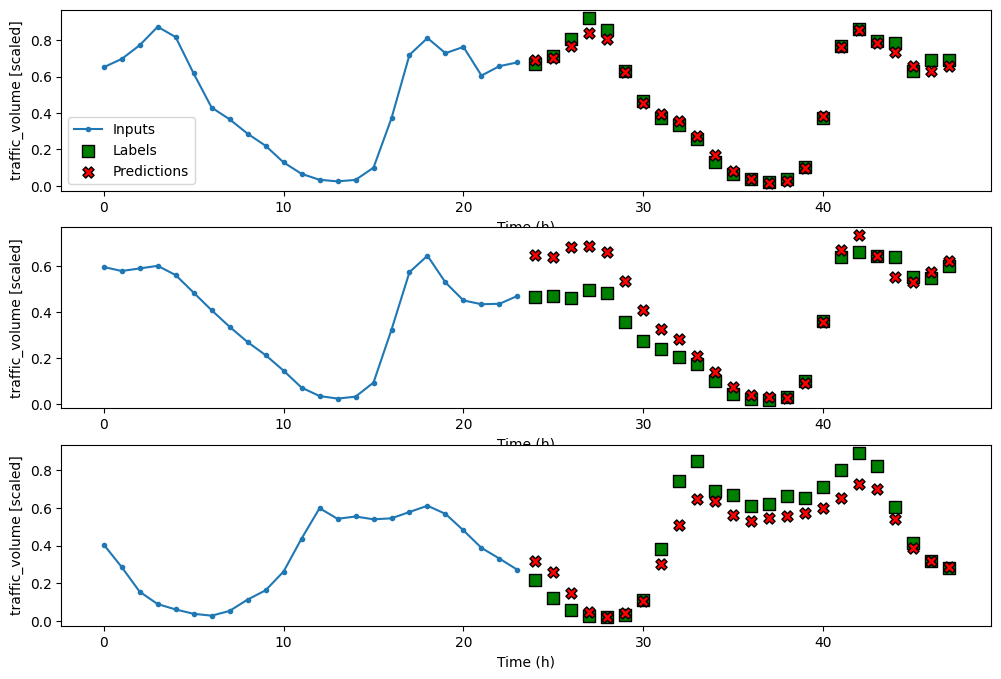

In [13]:
multi_window.plot(ms_lstm_model)

Figura. Prediciendo el volumen de tráfico durante las próximas 24 horas utilizando un modelo LSTM de múltiples pasos. Podemos ver algunas discrepancias entre las predicciones y las etiquetas. Por supuesto, esta inspección visual no es suficiente para evaluar el rendimiento del modelo.

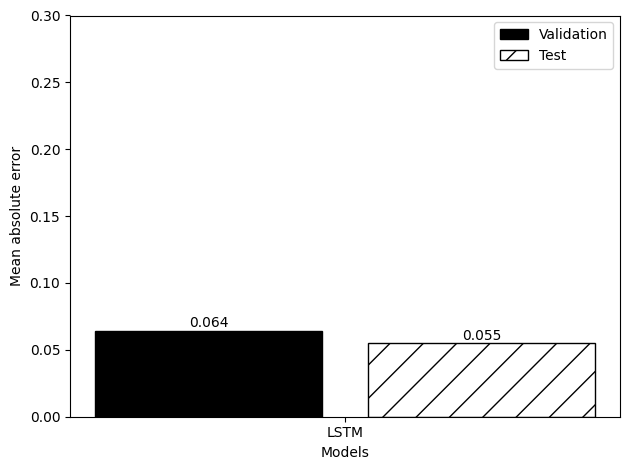

In [16]:
mae_val = [v[1] for v in ms_val_performance.values()]
mae_test = [v[1] for v in ms_performance.values()]
x = np.arange(len(performance))
fig, ax = plt.subplots()
ax.bar(x - 0.15, mae_val, width=0.25, color='black', edgecolor='black',label='Validation')
ax.bar(x + 0.15, mae_test, width=0.25, color='white', edgecolor='black',hatch='/', label='Test')
ax.set_ylabel('Mean absolute error')
ax.set_xlabel('Models')
for index, value in enumerate(mae_val):
    plt.text(x=index - 0.15, y=value+0.0025, s=str(round(value, 3)),ha='center')
for index, value in enumerate(mae_test):
    plt.text(x=index + 0.15, y=value+0.0025, s=str(round(value, 3)),ha='center')

plt.ylim(0, 0.3)
plt.xticks(ticks=x, labels=performance.keys())
plt.legend(loc='best')
plt.tight_layout()

## Implementando un LSTM como un modelo de multiples salidas

Finalmente, implementaremos un LSTM como un modelo de múltiples salidas. Nuevamente, usaremos 24 horas de datos de entrada, para que la red pueda procesar una secuencia de puntos de datos y utilizar información pasada para producir pronósticos. Las predicciones serán tanto para el volumen de tráfico como para la temperatura en el siguiente intervalo de tiempo.

En esta situación, la ventana de datos consiste en una entrada de 24 pasos de tiempo y 24 pasos de tiempo de etiquetas. El desplazamiento es 1, ya que queremos producir pronósticos solo para el siguiente paso de tiempo. Así, nuestro modelo estará creando pronósticos en ventana deslizante para generar predicciones un paso de tiempo a la vez, a lo largo de 24 pasos de tiempo. Especificaremos temp y traffic_volume como nuestras columnas objetivo.


In [17]:
mo_wide_window = DataWindow(input_width=24, label_width=24, shift=1,label_columns=['temp','traffic_volume'])

El siguiente paso es definir nuestro modelo LSTM. Al igual que antes, utilizaremos el modelo Secuencial para apilar una capa LSTM y una capa de salida Densa con dos unidades, ya que tenemos dos objetivos.

1. Tenemos dos unidades porque tenemos dos objetivos: la temperatura y el volumen de tráfico.

In [18]:
mo_lstm_model = Sequential([
    LSTM(32, return_sequences=True),
    Dense(units = 2) #1
])

Luego entrenaremos el modelo y almacenaremos sus métricas de rendimiento para comparación.

1. Crea un diccionario para contener el MAE de un modelo en el conjunto de validación.
2. Crea un diccionario para contener el MAE de un modelo en el conjunto de prueba.

In [19]:
history = compile_and_fit(mo_lstm_model, mo_wide_window)
mo_val_performance = {} #1
mo_performance = {} #2
mo_val_performance['LSTM'] = mo_lstm_model.evaluate(mo_wide_window.val)
mo_performance['LSTM'] = mo_lstm_model.evaluate(mo_wide_window.test, verbose=0)

Epoch 1/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0625 - mean_absolute_error: 0.1718 - val_loss: 0.0098 - val_mean_absolute_error: 0.0645
Epoch 2/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0074 - mean_absolute_error: 0.0561 - val_loss: 0.0044 - val_mean_absolute_error: 0.0430
Epoch 3/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0040 - mean_absolute_error: 0.0407 - val_loss: 0.0029 - val_mean_absolute_error: 0.0352
Epoch 4/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0030 - mean_absolute_error: 0.0349 - val_loss: 0.0024 - val_mean_absolute_error: 0.0315
Epoch 5/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0026 - mean_absolute_error: 0.0319 - val_loss: 0.0021 - val_mean_absolute_error: 0.0296
Epoch 6/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0024 - mean_absolute_error: 0.0301 - val_loss: 0.0020 - val_mean_absolute_error: 0.0295
Epoch 7/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0022 - mean_absolute_error: 0.0291 - v

Ahora podemos visualizar la predicción del volumen de tráfico y la temperatura. Ambas figuras muestran muchas predicciones (indicadas con cruces) que se superponen a las etiquetas (mostradas como cuadrados), lo que significa que tenemos un modelo eficiente generando predicciones precisas.

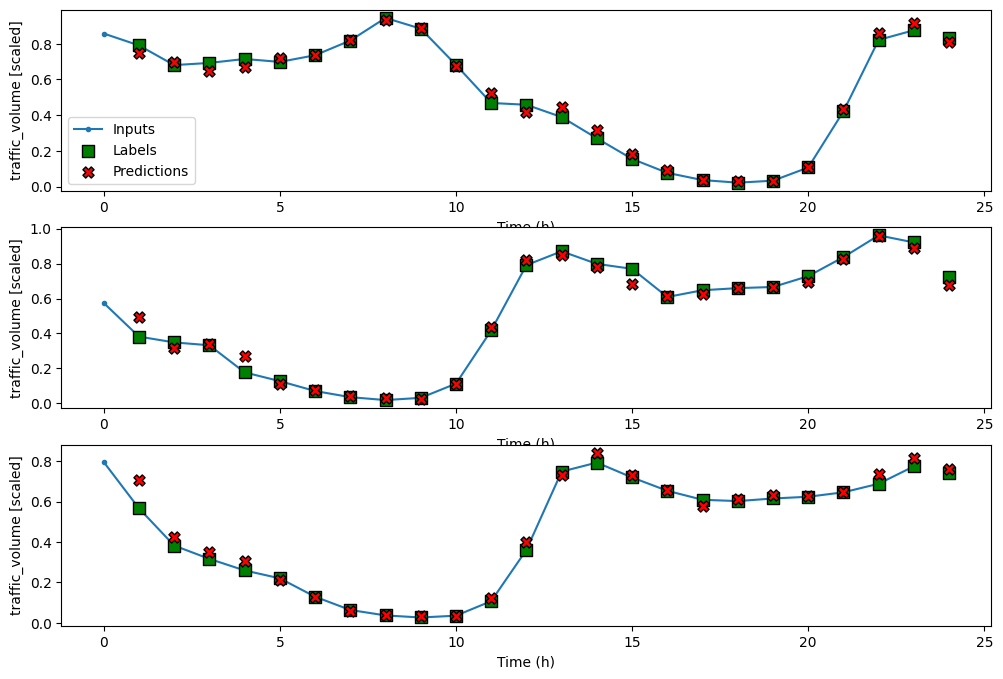

In [21]:
mo_wide_window.plot(model=mo_lstm_model, plot_col='traffic_volume')

Figura. Prediciendo el volumen de tráfico con un LSTM como modelo de múltiples salidas. Muchas predicciones (mostradas como cruces) se superponen a las etiquetas (mostradas como cuadrados), lo que sugiere predicciones muy precisas para el volumen de tráfico.

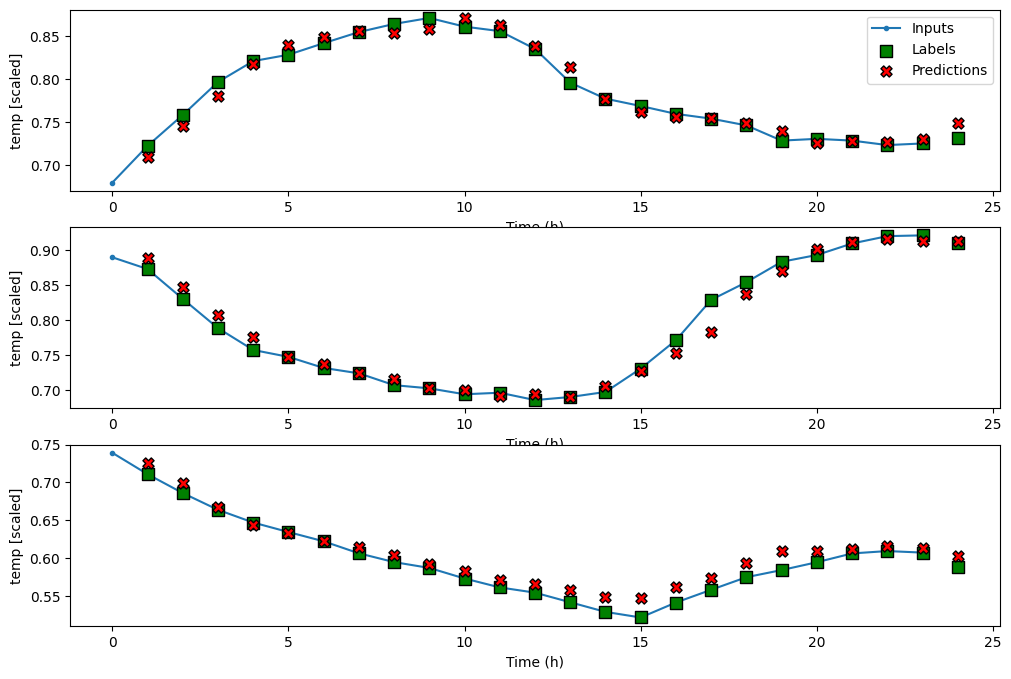

In [22]:
mo_wide_window.plot(model=mo_lstm_model, plot_col='temp')

Figura. Predicción de la temperatura utilizando un LSTM como modelo de múltiples salidas. Nuevamente, vemos mucha superposición entre las predicciones (que se muestran como cruces) y las etiquetas (que se muestran como cuadrados), lo que indica predicciones precisas.

# Proximos pasos

En este capítulo, examinamos la arquitectura de memoria a largo plazo y corto plazo (LSTM). Aprendiste que es un subtipo de RNN y viste cómo utiliza un estado de celda para superar el problema de la memoria a corto plazo que ocurre en una RNN básica que solo utiliza el estado oculto.

También estudiamos las tres puertas del LSTM. La puerta de olvido determina qué información del pasado y del presente debe ser mantenida, la puerta de entrada determina la información relevante del elemento actual de una secuencia, y la puerta de salida utiliza la información almacenada en memoria para generar una predicción.

Luego implementamos el LSTM como un modelo de un solo paso, un modelo de múltiples pasos y un modelo de múltiples salidas. En todos los casos, el LSTM fue el modelo ganador, ya que logró el menor MAE de todos los modelos construidos hasta ahora.

Luego implementamos el LSTM como un modelo de un solo paso, un modelo de múltiples pasos y un modelo de múltiples salidas. En todos los casos, el LSTM fue el modelo ganador, ya que alcanzó el MAE más bajo de todos los modelos construidos hasta ahora.

La arquitectura de aprendizaje profundo que exploraremos en el próximo capítulo es la red neuronal convolucional (CNN). Es posible que ya te hayas encontrado con una CNN, especialmente en visión por computadora, ya que es una arquitectura muy popular para analizar imágenes. La aplicaremos para la predicción de series temporales, ya que las CNN son más rápidas de entrenar que las LSTMs, son robustas al ruido y son buenos extractores de características.

# Resumen

- Una red neuronal recurrente (RNN) es una arquitectura de aprendizaje profundo especialmente adaptada para procesar secuencias de datos como una serie temporal.
- Los RNN usan un estado oculto para almacenar información en la memoria.Sin embargo, esto es solo memoria a corto plazo debido al problema del gradiente de desaparición.
- La memoria larga a corto plazo (LSTM, por sus siglas en inglés) es un tipo de RNN que aborda el problema de la memoria a corto plazo. Utiliza un estado de celda para almacenar información durante más tiempo, lo que le da a la red una memoria larga.
- El LSTM está formado por tres puertas:
    - La puerta del olvido determina qué información del pasado y del presente debe conservarse.
    - La puerta de entrada determina qué información del presente debe conservarse.
    - La puerta de salida usa información almacenada en la memoria para procesar el elemento actual de una secuencia.
    